# <a name="0">K means - EM</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [5]:
#read the data

data_path = 'C:\\Users\أحمد محمد\\Desktop\\New folder\\section\\countries_of_the_world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [6]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [7]:
# this will calculate the precentage of the null values in each column
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [8]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [9]:
#know the number of columns
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [10]:
#see the data type of each column 
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [11]:
#show the first five rows of the data
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [12]:
#check the unique values of countries
df.Country.unique()

array(['Afghanistan ', 'Albania ', 'Algeria ', 'American Samoa ',
       'Andorra ', 'Angola ', 'Anguilla ', 'Antigua & Barbuda ',
       'Argentina ', 'Armenia ', 'Aruba ', 'Australia ', 'Austria ',
       'Azerbaijan ', 'Bahamas, The ', 'Bahrain ', 'Bangladesh ',
       'Barbados ', 'Belarus ', 'Belgium ', 'Belize ', 'Benin ',
       'Bermuda ', 'Bhutan ', 'Bolivia ', 'Bosnia & Herzegovina ',
       'Botswana ', 'Brazil ', 'British Virgin Is. ', 'Brunei ',
       'Bulgaria ', 'Burkina Faso ', 'Burma ', 'Burundi ', 'Cambodia ',
       'Cameroon ', 'Canada ', 'Cape Verde ', 'Cayman Islands ',
       'Central African Rep. ', 'Chad ', 'Chile ', 'China ', 'Colombia ',
       'Comoros ', 'Congo, Dem. Rep. ', 'Congo, Repub. of the ',
       'Cook Islands ', 'Costa Rica ', "Cote d'Ivoire ", 'Croatia ',
       'Cuba ', 'Cyprus ', 'Czech Republic ', 'Denmark ', 'Djibouti ',
       'Dominica ', 'Dominican Republic ', 'East Timor ', 'Ecuador ',
       'Egypt ', 'El Salvador ', 'Equatorial Guinea

In [13]:
df.Region.unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [14]:
df.Country.value_counts()

Sao Tome & Principe     1
Rwanda                  1
South Africa            1
Korea, North            1
United States           1
                       ..
Angola                  1
Norway                  1
Barbados                1
Romania                 1
Seychelles              1
Name: Country, Length: 227, dtype: int64

In [15]:
df.Climate.unique()

array(['1', '3', '2', nan, '4', '1,5', '2,5'], dtype=object)

In [16]:
df.Region.value_counts()

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
WESTERN EUROPE                         28
ASIA (EX. NEAR EAST)                   28
OCEANIA                                21
NEAR EAST                              16
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64

In [17]:
#Check if there is any duplicated rows
df.duplicated().sum()

0

In [18]:
# measure of asymmetry of the distribution
skewness = df.skew()

In [19]:
#check the skewness of the columns
skewness

Population            9.200223
Area (sq. mi.)        5.964245
GDP ($ per capita)    1.375924
dtype: float64

- here all the values are positive which means the tail of the distribution is longer towards the right hand side of the curve

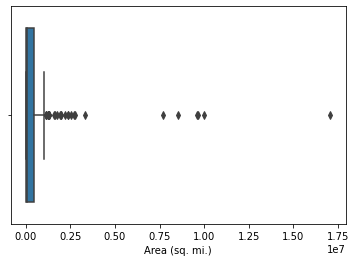

In [20]:
sns.boxplot(x=df['Area (sq. mi.)'])

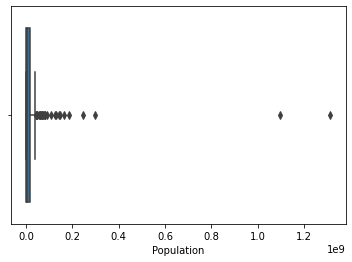

In [21]:
sns.boxplot(x=df['Population'])

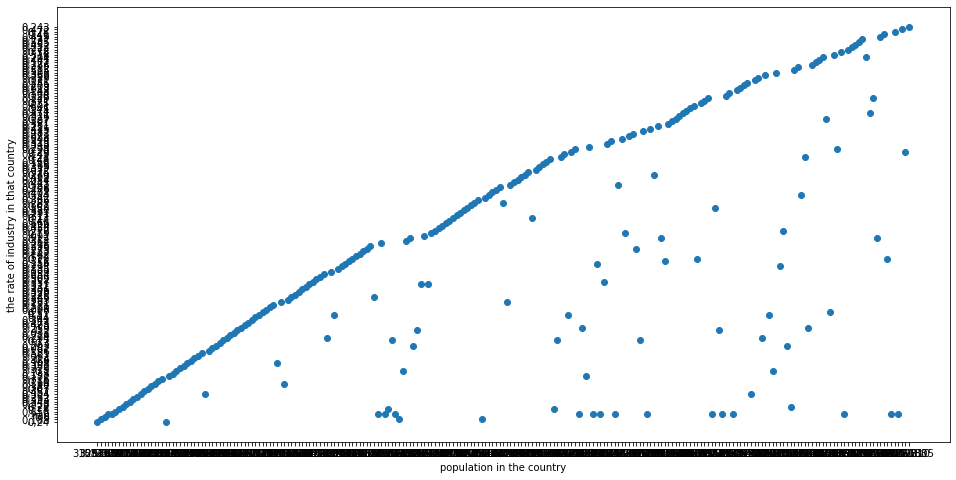

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Population'].astype(str), df['Industry'].astype(str))
ax.set_xlabel('population in the country')
ax.set_ylabel('the rate of industry in that country')
plt.show()

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
<br>
1- There are Two columns are not in the proper data type

- Country
- Region


<br>
<br>

2- There are missing values in 
- Net migration                         
- Infant mortality (per 1000 births)    
- GDP($ per capita)                    
- Literacy(%)                          
- Phones(per 1000)                     
- Arable (%)                            
- Crops (%)                             
- Other (%)                             
- Climate                               
- Birthrate                             
- Deathrate                             
- Agriculture                           
- Industry                              
- Service                               

<br>

<br>
3- There are object data type columns need to be converted to its proper data type 

<br>

In [23]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**
- Get rid of categorical values

In [24]:
#solution 
df.drop(columns = ['Country','Region'] , inplace = True)

In [25]:
#test 
df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


**Second issue**
- treating with the missing values

In [26]:
#solution 
df = df.dropna()

In [27]:
#test 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          179 non-null    int64  
 1   Area (sq. mi.)                      179 non-null    int64  
 2   Pop. Density (per sq. mi.)          179 non-null    object 
 3   Coastline (coast/area ratio)        179 non-null    object 
 4   Net migration                       179 non-null    object 
 5   Infant mortality (per 1000 births)  179 non-null    object 
 6   GDP ($ per capita)                  179 non-null    float64
 7   Literacy (%)                        179 non-null    object 
 8   Phones (per 1000)                   179 non-null    object 
 9   Arable (%)                          179 non-null    object 
 10  Crops (%)                           179 non-null    object 
 11  Other (%)                           179 non-n

**Third issue**
- converting object type columns to its proper format 

In [28]:
#that function converts the data type to its proper format
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','')
    return float(new_val)

In [29]:
df['Pop. Density (per sq. mi.)'] = df['Pop. Density (per sq. mi.)'].apply(convert_currency)
df['Coastline (coast/area ratio)'] = df['Coastline (coast/area ratio)'].apply(convert_currency)
df['Net migration'] = df['Net migration'].apply(convert_currency)
df['Infant mortality (per 1000 births)'] = df['Infant mortality (per 1000 births)'].apply(convert_currency)
df['Literacy (%)'] = df['Literacy (%)'].apply(convert_currency)
df['Phones (per 1000)'] = df['Phones (per 1000)'].apply(convert_currency)
df['Arable (%)'] = df['Arable (%)'].apply(convert_currency)
df['Crops (%)'] = df['Crops (%)'].apply(convert_currency)
df['Other (%)'] = df['Other (%)'].apply(convert_currency)
df['Birthrate'] = df['Birthrate'].apply(convert_currency)
df['Deathrate'] = df['Deathrate'].apply(convert_currency)
df['Agriculture'] = df['Agriculture'].apply(convert_currency)
df['Industry'] = df['Industry'].apply(convert_currency)
df['Service'] = df['Service'].apply(convert_currency)

In [30]:
df['Climate'] = df.Climate.str.extract("([-+]?\d*\.\d+|\d+)").astype(int)

In [31]:
#test
df.dtypes

Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                                 int32
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [32]:
df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,480.0,0.0,2306.0,16307.0,700.0,360.0,32.0,1213.0,22.0,8765.0,1,466.0,2034.0,38.0,24.0,38.0
1,3581655,28748,1246.0,126.0,-493.0,2152.0,4500.0,865.0,712.0,2109.0,442.0,7449.0,3,1511.0,522.0,232.0,188.0,579.0
2,32930091,2381740,138.0,4.0,-39.0,31.0,6000.0,700.0,781.0,322.0,25.0,9653.0,1,1714.0,461.0,101.0,6.0,298.0
6,13477,102,1321.0,5980.0,1076.0,2103.0,8600.0,950.0,4600.0,0.0,0.0,100.0,2,1417.0,534.0,4.0,18.0,78.0
7,69108,443,1560.0,3454.0,-615.0,1946.0,11000.0,890.0,5499.0,1818.0,455.0,7727.0,2,1693.0,537.0,38.0,22.0,743.0


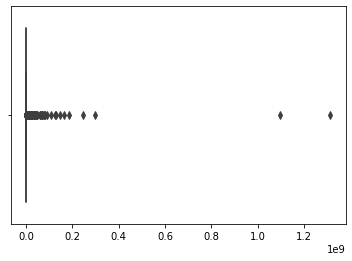

In [33]:
#outliers
sns.boxplot(x=df)

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [34]:
from sklearn import preprocessing

In [35]:
scaler = preprocessing.StandardScaler().fit(df)

In [36]:
scaler

StandardScaler()

In [37]:
scaler.mean_

array([ 3.42141495e+07,  5.64183000e+05,  2.94805028e+03,  1.64951955e+03,
       -5.97206704e+00,  3.46108380e+03,  9.12569832e+03,  8.19441341e+02,
        2.08151955e+03,  1.20496089e+03,  4.15424581e+02,  7.16164804e+03,
        2.07821229e+00,  2.11986034e+03,  8.57972067e+02,  1.13865922e+02,
        2.22513966e+02,  4.17346369e+02])

In [38]:
scaler.scale_

array([1.31395318e+08, 1.39175310e+06, 1.37549422e+04, 7.37706698e+03,
       4.61799872e+02, 3.50320721e+03, 9.61714652e+03, 1.97820472e+02,
       2.09534121e+03, 1.29616471e+03, 7.97146005e+02, 2.96239751e+03,
       7.20432164e-01, 1.25079912e+03, 5.19442723e+02, 1.30650174e+02,
       1.72704687e+02, 2.63393969e+02])

In [39]:
df_scaled = scaler.transform(df)

In [40]:
df_scaled

array([[-0.02402789,  0.05986479, -0.17943007, ..., -0.58067984,
        -1.14944168, -1.4402242 ],
       [-0.23313231, -0.38471982, -0.123741  , ...,  0.90420146,
        -0.19984383,  0.61373323],
       [-0.00977248,  1.30594788, -0.20429386, ..., -0.09847612,
        -1.25366584, -0.45310972],
       ...,
       [-0.09709601, -0.0260197 , -0.18480996, ...,  0.16176081,
         1.44458172, -0.09243328],
       [-0.17285349,  0.13539111, -0.20320335, ..., -0.70314427,
        -1.12049053,  0.27203976],
       [-0.16726125, -0.12473692, -0.19157116, ...,  0.49853801,
         0.11861886,  0.61373323]])

In [41]:
df_scaled.mean(axis=0)

array([ 9.92378123e-18, -4.96189061e-18, -3.47332343e-17,  9.92378123e-18,
       -2.97713437e-17,  1.86070898e-18, -9.42759216e-17,  8.43521404e-17,
        8.93140310e-17,  6.57450506e-17, -2.97713437e-17,  1.09161593e-16,
        2.77865874e-16,  0.00000000e+00, -4.96189061e-18, -2.23285078e-17,
        3.22522890e-17, -1.38932937e-16])

###### here is an issue that the mean didn't give me zero and i didn't manage to solve the problem

In [42]:
df_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
- Number of clusters


### *Number of clusters*
Use elbow method to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [43]:
#training
#import k means
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

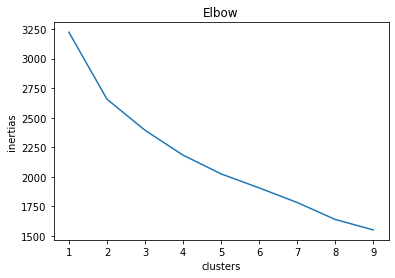

In [44]:
ilist = []
n = 10
for i in range(1,n):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    ilist.append(kmeans.inertia_)
    
plt.plot(range(1,n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()


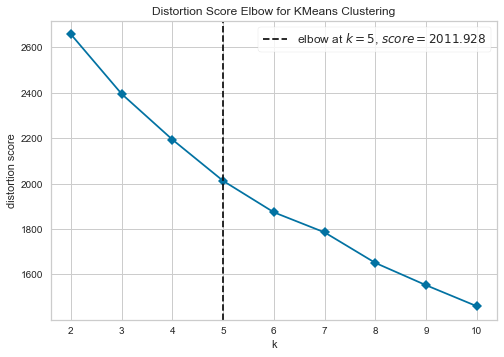

In [45]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KElbowVisualizer(KMeans(), k=10 , timings = False)
model.fit(df_scaled)
model.show()

In [46]:
#check the silhouette_score with the number of clausters
def score_n():
    
    score = []
    for n in range(2,10):
        
        kmean = KMeans(n_clusters= n )
        kmean.fit(df_scaled)
        result = kmean.labels_
        print(n , '    '  , silhouette_score(df_scaled , result))
        score.append(silhouette_score(df_scaled , result))    

In [47]:
score_n()

2      0.18157496882430105
3      0.14968161940900176
4      0.15877266141243762
5      0.14555866930526848
6      0.14477391831863726
7      0.13676492482347605
8      0.1602410479505417
9      0.13685476441063316


In [48]:
model = KMeans(n_clusters= 5)
kmeans = model.fit_predict(df_scaled)

In [49]:
model1 = model.labels_

In [50]:
model1

array([0, 3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 0, 1, 0, 3,
       3, 3, 1, 1, 3, 0, 0, 0, 3, 0, 3, 1, 0, 0, 1, 4, 3, 3, 0, 0, 3, 0,
       3, 1, 1, 0, 3, 3, 3, 3, 3, 0, 0, 1, 0, 3, 1, 1, 1, 1, 0, 0, 3, 1,
       0, 1, 3, 3, 3, 0, 0, 3, 0, 3, 1, 1, 1, 4, 3, 3, 0, 1, 1, 3, 1, 3,
       1, 0, 3, 1, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3,
       2, 3, 0, 0, 1, 3, 1, 1, 3, 0, 0, 1, 3, 0, 1, 3, 0, 3, 3, 3, 3, 1,
       3, 1, 3, 3, 0, 1, 3, 3, 3, 3, 3, 0, 3, 0, 1, 0, 3, 1, 3, 0, 3, 0,
       1, 1, 3, 1, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 1, 1, 1, 1, 3, 0, 3, 3,
       0, 3, 0])

In [51]:
sm.silhouette_score(df_scaled , labels = model1)

0.15304030807823535

In [52]:
#import EM
from sklearn.mixture import GaussianMixture

In [53]:
model_EM= GaussianMixture(n_components=5, random_state=0).fit(df_scaled)

In [54]:
model_EM.means_

array([[-1.06238263e-01, -5.75466644e-02, -1.64369804e-01,
        -2.18428906e-01,  8.72819321e-02,  1.23645536e+00,
        -7.89740914e-01, -1.18333148e+00, -9.34173659e-01,
        -1.08263673e-01, -2.08443776e-01,  1.26038317e-01,
        -3.25038564e-01,  1.24251437e+00,  1.02962071e+00,
         9.59310092e-01, -8.28972018e-02, -5.17045934e-01],
       [-9.65633724e-02,  3.88681254e-02,  1.12641837e-01,
        -3.84487679e-02,  5.53773363e-01, -7.80921346e-01,
         1.39115337e+00,  7.39190236e-01,  1.21669635e+00,
         4.55977611e-02, -3.23212595e-01,  1.64489871e-01,
         8.01084367e-01, -7.93745735e-01, -1.66188860e-01,
        -6.78400710e-01,  2.93550942e-01,  7.02647524e-01],
       [-1.50070620e-01, -3.26563541e-01, -5.99056962e-02,
         3.36719786e-01, -3.24963208e-01, -3.45747891e-01,
        -2.77547352e-01,  3.22849375e-01,  8.10665487e-03,
         3.98591044e-01,  7.46429868e-01, -6.01426601e-01,
         1.56109244e-01, -3.46639144e-01, -3.31562946e

In [55]:
prediction = model_EM.predict(df_scaled)

In [56]:
sm.silhouette_score(df_scaled , prediction)

0.13034613870381714

In [57]:
##conda install -c districtdatalabs yellowbrick

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [58]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components = 0.90)
pca.fit(df_scaled)
reduced = pca.transform(df_scaled)

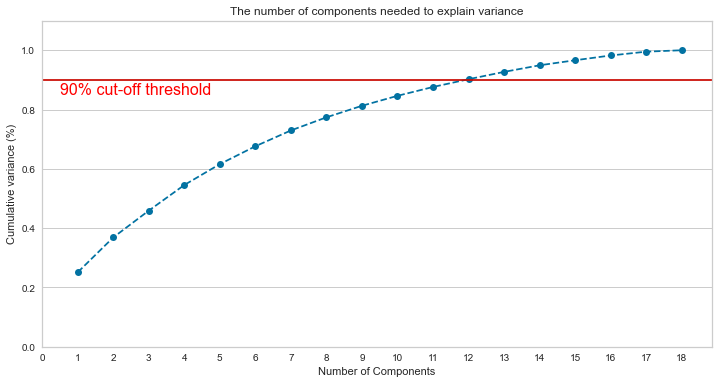

In [72]:
pca = PCA().fit(df_scaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 19, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 19, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

- number of components will be 12

In [73]:
PCA_model =PCA(n_components=12 ,svd_solver='full')

In [74]:
PCA_model.fit_transform(df_scaled)

array([[ 3.03013307, -2.93080428, -2.16692304, ..., -0.94291782,
         1.89933   , -0.45548685],
       [-0.14046719,  1.18797471, -0.41058137, ...,  0.60278433,
        -0.07919404,  0.21870797],
       [ 0.51289966, -1.20562009,  1.67164937, ..., -0.32828742,
         0.46731602, -0.1369961 ],
       ...,
       [ 1.81676946, -1.14854387,  1.55222676, ..., -0.34075838,
        -0.28416192, -0.03423079],
       [ 0.81397275,  0.36895037, -1.56171364, ..., -0.18231355,
         0.07459698, -1.91465872],
       [ 1.61047231, -0.49355162, -1.27338287, ..., -0.28741601,
         0.02844075, -0.24481311]])

In [75]:
PCA_model.explained_variance_ratio_

array([0.25127583, 0.11749434, 0.09035524, 0.08641531, 0.0704693 ,
       0.06018595, 0.05333532, 0.04424734, 0.03890977, 0.03359201,
       0.02982292, 0.02621503])

In [76]:
PCA_model.singular_values_

array([28.45365947, 19.45679195, 17.06237327, 16.68622598, 15.06824747,
       13.92548483, 13.10901997, 11.94005549, 11.19675242, 10.40353064,
        9.80252321,  9.19047532])

In [77]:
df_new = PCA_model.fit_transform(df_scaled)

In [78]:
df_new

array([[ 3.03013307, -2.93080428, -2.16692304, ..., -0.94291782,
         1.89933   , -0.45548685],
       [-0.14046719,  1.18797471, -0.41058137, ...,  0.60278433,
        -0.07919404,  0.21870797],
       [ 0.51289966, -1.20562009,  1.67164937, ..., -0.32828742,
         0.46731602, -0.1369961 ],
       ...,
       [ 1.81676946, -1.14854387,  1.55222676, ..., -0.34075838,
        -0.28416192, -0.03423079],
       [ 0.81397275,  0.36895037, -1.56171364, ..., -0.18231355,
         0.07459698, -1.91465872],
       [ 1.61047231, -0.49355162, -1.27338287, ..., -0.28741601,
         0.02844075, -0.24481311]])

In [79]:
df_new.shape

(179, 12)

#### K means model

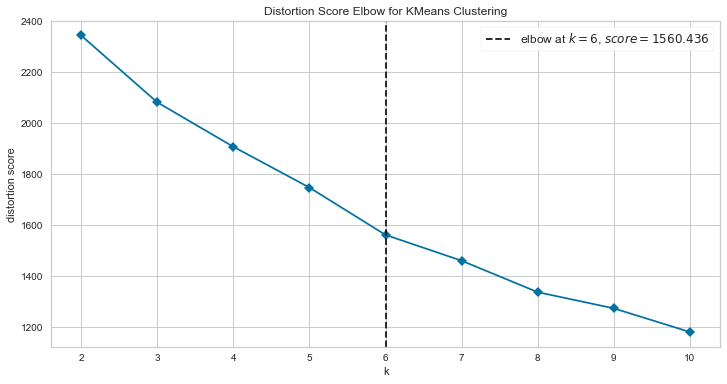

In [80]:
model2 = KElbowVisualizer(KMeans(), k=10 , timings = False)
model2.fit(df_new)
model2.show()

In [103]:
model2 = KMeans(n_clusters= 6)
kmeans = model2.fit_predict(df_new)

In [104]:
m = model2.labels_
sm.silhouette_score(df_new , labels = m)

0.17757196382107007

#### EM model

In [107]:
model_EM2= GaussianMixture(n_components=5, random_state=0).fit(df_new)

In [108]:
model_EM2.means_

array([[ 1.87011344e+00, -1.91436383e-01, -1.92886188e-01,
        -1.21857159e-01, -1.22796199e-01,  1.03788298e-01,
         7.50909655e-02, -4.08941986e-03,  1.49896184e-01,
         5.94034175e-02,  7.35773173e-02, -3.63958070e-02],
       [-1.74283388e+00, -8.41878183e-02, -6.02668750e-01,
         3.19739275e-01, -5.51112055e-01,  5.64670088e-02,
         1.46605542e-01,  1.76240666e-02, -5.86476138e-02,
        -1.08568421e-01,  2.81690149e-02,  6.73653494e-02],
       [-2.03201011e+00, -2.36788138e-01,  4.23946336e-01,
        -1.26690633e+00,  8.59369477e-01, -6.47322496e-02,
        -3.26280385e-01,  5.55090855e-03, -9.22561453e-02,
         2.72420191e-01,  1.58426773e-01, -1.43922479e-01],
       [ 1.55051652e-01,  2.05521265e+00,  1.19142509e+00,
         3.29578214e-01,  2.51842251e-01, -5.07930829e-01,
        -4.41291552e-01, -6.91805407e-03, -2.66685155e-01,
        -2.98378919e-01, -4.57851639e-01,  1.58195844e-01],
       [-9.00141281e-01, -3.90768669e+00,  2.8900030

In [109]:
prediction = model_EM2.predict(df_new)

In [110]:
sm.silhouette_score(df_new , prediction)

0.15074832654206122

- Using different transformation

In [87]:
from sklearn.preprocessing import MaxAbsScaler
scaler2 = MaxAbsScaler()
df_scaled2 = scaler2.fit_transform(df)
df_scaled2

array([[0.02363593, 0.06722789, 0.00296608, ..., 0.04941482, 0.02649007,
        0.03983229],
       [0.00272582, 0.00298481, 0.00769944, ..., 0.30169051, 0.20750552,
        0.60691824],
       [0.02506145, 0.24728856, 0.00085275, ..., 0.1313394 , 0.00662252,
        0.31236897],
       ...,
       [0.01632924, 0.05481746, 0.00250881, ..., 0.17555267, 0.5209713 ,
        0.41194969],
       [0.00875361, 0.07814154, 0.00094544, ..., 0.02860858, 0.03200883,
        0.51257862],
       [0.00931282, 0.04055269, 0.00193413, ..., 0.23276983, 0.26821192,
        0.60691824]])

In [95]:
PCA_model2 =PCA(n_components=12 ,svd_solver='full')

In [96]:
df_new2 = PCA_model.fit_transform(df_scaled2)

In [97]:
df_new2

array([[-0.62479146, -0.19490867,  0.78736167, ..., -0.14292865,
         0.55476259,  0.16675294],
       [ 0.03383387,  0.08476616, -0.3682651 , ...,  0.1683623 ,
        -0.06952986, -0.03897952],
       [-0.1271194 , -0.28457851,  0.16853988, ..., -0.05335169,
        -0.13420446, -0.08364837],
       ...,
       [-0.44450141, -0.38694316, -0.07896583, ..., -0.06014035,
        -0.27626199, -0.10300527],
       [-0.12208217,  0.57450482,  0.06965619, ..., -0.18071003,
         0.11421693,  0.05962671],
       [-0.31536007, -0.18532157, -0.19861039, ..., -0.07484454,
         0.1355472 , -0.13217923]])

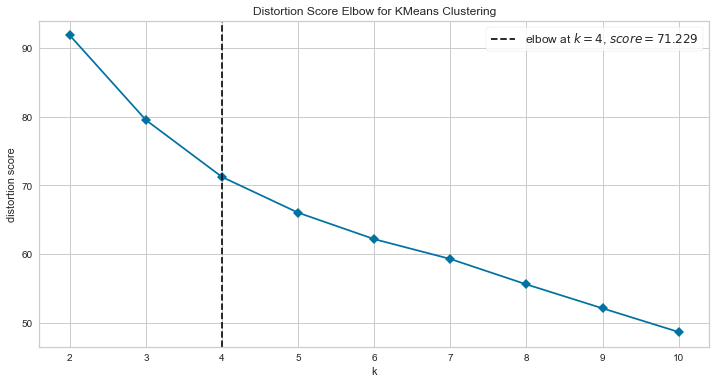

In [99]:
model3 = KElbowVisualizer(KMeans(), k=10 , timings = False)
model3.fit(df_new2)
model3.show()

In [114]:
model3 = KMeans(n_clusters= 4)
kmeans = model3.fit_predict(df_new2)

In [115]:
m = model3.labels_
sm.silhouette_score(df_scaled2 , labels = m)

0.1584363798479767